## Importing Required Librabies 

In [1]:
import requests as req
import cv2
import pandas as pd
from bs4 import BeautifulSoup
import re
import numpy as np
import time 
import seaborn as sb
import matplotlib.pyplot as plt 

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [159]:
import warnings
warnings.filterwarnings("ignore") 

## Creating a containers[Lists] to Store Scrapped Data records

In [54]:
models=[]
Range=[]
Efficiency=[]
Weight=[]
time_to_accerlate=[]
_1_Stop_Range=[]
Battery=[]
Status=[]
Fastcharge=[]
Towing=[]
Cargo_Vol=[]
Price_by_range=[]
wheel_Drive=[]
No_of_seats=[]
Heat_pump=[]
Towbar=[]
safety_rating=[]
Bi_directional_charging=[]
Price_In_pounds=[]


### Working on main code

In [109]:

for i in range(1,20): 
    stime=time.time()
    url=f'https://ev-database.org/#group=vehicle-group&rs-pr=10000_100000&rs-er=0_1000&rs-ld=0_1000&rs-ac=2_23&rs-dcfc=0_400&rs-ub=10_200&rs-tw=0_2500&rs-ef=100_350&rs-sa=-1_5&rs-w=1000_3500&rs-c=0_5000&rs-y=2010_2030&s=1&p={i}-50'
    res=req.get(url)
    soup=BeautifulSoup(res.text)
    cont=soup.find_all('div',attrs={'class':"list-item"})
    for every in cont:
        m=every.find('span',attrs={'class':"model"})
        models.append(m.text if m.text  else np.nan )
        ran=every.find('span',attrs={'class':"erange_real"})
        Range.append(ran.text if ran.text  else np.nan )
        EFF=every.find('span',attrs={'class':"efficiency"})
        Efficiency.append(EFF.text if EFF.text  else np.nan )
        wt=every.find('span',attrs={'class':"weight_p"})
        Weight.append(wt.text if wt.text  else np.nan )
        ACC=every.find('span',attrs={'class':"acceleration_p"})
        time_to_accerlate.append(ACC.text if ACC.text  else np.nan )
        sr=every.find('span',attrs={'class':"long_distance_total"})
        _1_Stop_Range.append(sr.text if sr.text  else np.nan )
        btt=every.find('span',attrs={'class':"battery_p"})
        Battery.append(btt.text if btt.text  else np.nan )
        FC=every.find('span',attrs={'class':"fastcharge_speed_print"})
        Fastcharge.append(FC.text if FC.text  else np.nan )
        Tow=every.find('span',attrs={'class':"towweight_p"})
        Towing.append(Tow.text if Tow.text  else np.nan )
        Cvol=every.find('span',attrs={'class':"cargo"})
        Cargo_Vol.append(Cvol.text if Cvol.text  else np.nan )
        pr=every.find('span',attrs={'class':"priceperrange_p"})
        Price_by_range.append(pr.text if pr.text  else np.nan )


        st = every.find("div", class_="availability")

        if st:
            status_text = st.get_text(strip=True)
            if "Discontinued" in status_text:
                Status.append(st.text.strip())
            elif "Available" in status_text:
                Status.append(st.text.strip())
            else:
                Status.append(status_text)   
        else:
            Status.append(np.nan)

        pd=every.find('span',attrs={'class':"country_uk"})
        Price_In_pounds.append(pd.text if pd.text  else np.nan )

        
        hp = every.find("span", {"class": "heatpump hidden"})
        
        if hp:   # element found
            Heat_pump.append("Available")
        else:    # not found
            Heat_pump.append("Not Available")

        
        T=every.find('span',attrs={'class':"tow-hitch hidden"})
        Towbar.append(T.text if T!=None else np.nan)



        i_tag = every.find("i", {"class": "fas fa-star"})

        if i_tag:
            span_tag = i_tag.find_next("span")
            value = span_tag.get_text(strip=True) if span_tag else np.nan
        else:
            value = np.nan
        
        safety_rating.append(value)
        
        i_tag2 = every.find("i", {"class": "seats-5 fas fa-user"})

        if i_tag2:
            span_tag2 = i_tag2.find_next("span")
            value2 = span_tag2.get_text(strip=True) if span_tag2 else np.nan
        else:
            value2= np.nan
        
        No_of_seats.append(value2)
        

    print(f"page{i} completed in {time.time()-stime:.2f} sec")


page1 completed in 13.71 sec
page2 completed in 13.99 sec
page3 completed in 15.76 sec
page4 completed in 16.09 sec
page5 completed in 15.03 sec
page6 completed in 13.36 sec
page7 completed in 13.88 sec
page8 completed in 13.85 sec
page9 completed in 13.63 sec
page10 completed in 13.59 sec
page11 completed in 14.07 sec
page12 completed in 13.40 sec
page13 completed in 13.71 sec
page14 completed in 15.21 sec
page15 completed in 10.68 sec
page16 completed in 13.87 sec
page17 completed in 13.14 sec
page18 completed in 13.48 sec
page19 completed in 13.50 sec


## Checking wheather all the datapoints of features are equal or not 

In [110]:
lst=[models,
Range,
Efficiency,
Weight,
time_to_accerlate,
_1_Stop_Range,
Battery,
Status,
Fastcharge,
Towing,
Cargo_Vol,
Price_by_range,
No_of_seats,
Heat_pump,
Towbar,
safety_rating,
Price_In_pounds

]

for every in lst:
    print(len(every))

21831
21831
21831
21831
21831
21831
21831
21831
21831
21831
21831
21831
21831
21831
21831
21831
21831


## Creating the Dict of Lists to create Data frame 

In [111]:
ev={
'Model':models,
'Range':Range,
'Efficiency':Efficiency,
'Weight':Weight,
'Time_to_accerlate':time_to_accerlate,
'_1_Stop_Range':_1_Stop_Range,
'Battery':Battery,
'Avalability_Status':Status,
'Fastcharge':Fastcharge,
'Towing_Capacity':Towing,
'Cargo_Volume':Cargo_Vol,
'Price_by_range_km':Price_by_range,
'No_of_seats':No_of_seats,
'Heat_pump_availavility':Heat_pump,
'Towbar_availability':Towbar,
'Safety_rating':safety_rating,
'Price_In_pounds':Price_In_pounds
}

## Creating DataFrame 

In [115]:
df=pd.DataFrame(ev)
df

,Model,Range,Efficiency,Weight,Time_to_accerlate,_1_Stop_Range,Battery,Avalability_Status,Fastcharge,Towing_Capacity,Cargo_Volume,Price_by_range_km,No_of_seats,Heat_pump_availavility,Towbar_availability,Safety_rating,Price_In_pounds
0,MG4 Electric 64 kWh,360 km,171 Wh/km,1726 kg,7.9 sec,405 km,61.7 kWh,Available to order since October 2022,115 kW,500 kg,363 L,€102 /km,5,Available,Towbar possible,5,"£29,495"
1,iX3 50 xDrive (MY26),610 km,178 Wh/km,2360 kg,4.9 sec,742 km,108.7 kWh,Available to order since September 2025,225 kW,2000 kg,578 L,€113 /km,5,Available,Towbar possible,-1,"£58,755"
2,Model Y Long Range AWD (Juniper),455 km,165 Wh/km,2072 kg,4.8 sec,535 km,75.0 kWh,Discontinued (February 2025 - October 2025),124 kW,1600 kg,971 L,€122 /km,5,Available,Towbar possible,-1,"£51,990"
3,iX xDrive40,360 km,197 Wh/km,2440 kg,6.1 sec,388 km,71.0 kWh,Discontinued (October 2021 - January 2025),102 kW,2500 kg,500 L,€225 /km,5,Available,Towbar possible,5,"£69,905"
4,Model Y RWD (Juniper),375 km,160 Wh/km,2003 kg,5.9 sec,438 km,60.0 kWh,Available to order since February 2025,110 kW,1600 kg,971 L,€128 /km,5,Available,Towbar possible,-1,"£44,990"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21826,ë-Jumpy Combi M 50 kWh,185 km,250 Wh/km,1969 kg,12.1 sec,198 km,46.3 kWh,Discontinued (November 2020 - January 2024),78 kW,1000 kg,507 L,€270 /km,NaN,Available,Towbar possible,-1,N/A
21827,e-Traveller Compact 50 kWh,185 km,250 Wh/km,1932 kg,12.1 sec,191 km,46.3 kWh,Discontinued (January 2021 - January 2022),78 kW,1000 kg,unknown,€275 /km,NaN,Available,Towbar possible,-1,N/A
21828,E-Ulysse L3 50 kWh,180 km,257 Wh/km,1989 kg,12.1 sec,191 km,46.3 kWh,Discontinued (June 2022 - January 2024),78 kW,1000 kg,800 L,€317 /km,NaN,Available,Towbar possible,-1,N/A
21829,e-Expert Combi Compact 50 kWh,185 km,250 Wh/km,1932 kg,12.1 sec,191 km,46.3 kWh,Discontinued (February 2021 - June 2022),78 kW,1000 kg,unknown,€243 /km,NaN,Available,Towbar possible,-1,N/A


## Converting the dataFrame into CsV file 

In [116]:
df.to_csv(r"D:\DS\Projects\EDA\Web_Scrapping\EV\temp1.csv",index=False)

In [8]:
df=pd.read_csv(r"D:\DS\Projects\EDA\Web_Scrapping\EV\temp1.csv")

In [9]:
df

,Model,Range,Efficiency,Weight,Time_to_accerlate,_1_Stop_Range,Battery,Avalability_Status,Fastcharge,Towing_Capacity,Cargo_Volume,Price_by_range_km,No_of_seats,Heat_pump_availavility,Towbar_availability,Safety_rating,Price_In_pounds
0,MG4 Electric 64 kWh,360 km,171 Wh/km,1726 kg,7.9 sec,405 km,61.7 kWh,Available to order since October 2022,115 kW,500 kg,363 L,€102 /km,5.0,Available,Towbar possible,5,"£29,495"
1,iX3 50 xDrive (MY26),610 km,178 Wh/km,2360 kg,4.9 sec,742 km,108.7 kWh,Available to order since September 2025,225 kW,2000 kg,578 L,€113 /km,5.0,Available,Towbar possible,-1,"£58,755"
2,Model Y Long Range AWD (Juniper),455 km,165 Wh/km,2072 kg,4.8 sec,535 km,75.0 kWh,Discontinued (February 2025 - October 2025),124 kW,1600 kg,971 L,€122 /km,5.0,Available,Towbar possible,-1,"£51,990"
3,iX xDrive40,360 km,197 Wh/km,2440 kg,6.1 sec,388 km,71.0 kWh,Discontinued (October 2021 - January 2025),102 kW,2500 kg,500 L,€225 /km,5.0,Available,Towbar possible,5,"£69,905"
4,Model Y RWD (Juniper),375 km,160 Wh/km,2003 kg,5.9 sec,438 km,60.0 kWh,Available to order since February 2025,110 kW,1600 kg,971 L,€128 /km,5.0,Available,Towbar possible,-1,"£44,990"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21826,ë-Jumpy Combi M 50 kWh,185 km,250 Wh/km,1969 kg,12.1 sec,198 km,46.3 kWh,Discontinued (November 2020 - January 2024),78 kW,1000 kg,507 L,€270 /km,NaN,Available,Towbar possible,-1,NaN
21827,e-Traveller Compact 50 kWh,185 km,250 Wh/km,1932 kg,12.1 sec,191 km,46.3 kWh,Discontinued (January 2021 - January 2022),78 kW,1000 kg,unknown,€275 /km,NaN,Available,Towbar possible,-1,NaN
21828,E-Ulysse L3 50 kWh,180 km,257 Wh/km,1989 kg,12.1 sec,191 km,46.3 kWh,Discontinued (June 2022 - January 2024),78 kW,1000 kg,800 L,€317 /km,NaN,Available,Towbar possible,-1,NaN
21829,e-Expert Combi Compact 50 kWh,185 km,250 Wh/km,1932 kg,12.1 sec,191 km,46.3 kWh,Discontinued (February 2021 - June 2022),78 kW,1000 kg,unknown,€243 /km,NaN,Available,Towbar possible,-1,NaN


# Cleaning the DataFrame

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21831 entries, 0 to 21830
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Model                   21831 non-null  object 
 1   Range                   21831 non-null  object 
 2   Efficiency              21831 non-null  object 
 3   Weight                  21831 non-null  object 
 4   Time_to_accerlate       21831 non-null  object 
 5   _1_Stop_Range           21831 non-null  object 
 6   Battery                 21831 non-null  object 
 7   Avalability_Status      21831 non-null  object 
 8   Fastcharge              21831 non-null  object 
 9   Towing_Capacity         21831 non-null  object 
 10  Cargo_Volume            21831 non-null  object 
 11  Price_by_range_km       21831 non-null  object 
 12  No_of_seats             17100 non-null  float64
 13  Heat_pump_availavility  21831 non-null  object 
 14  Towbar_availability     14915 non-null

In [11]:
df.describe()

,No_of_seats,Safety_rating
count,17100.0,21831.000000
mean,5.0,2.248912
std,0.0,2.916186
min,5.0,-1.000000
25%,5.0,-1.000000
50%,5.0,4.000000
75%,5.0,5.000000
max,5.0,5.000000


## Removing the Duplicates first 

In [13]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21826     True
21827     True
21828     True
21829     True
21830     True
Length: 21831, dtype: bool

In [16]:
df.drop_duplicates(inplace=True)

### Checking for Missing values 

In [17]:
df.isna().sum()

Model                       0
Range                       0
Efficiency                  0
Weight                      0
Time_to_accerlate           0
_1_Stop_Range               0
Battery                     0
Avalability_Status          0
Fastcharge                  0
Towing_Capacity             0
Cargo_Volume                0
Price_by_range_km           0
No_of_seats               249
Heat_pump_availavility      0
Towbar_availability       364
Safety_rating               0
Price_In_pounds           316
dtype: int64

### Calculating the percentages of Duplicates 

In [21]:
x=df.isna().mean()*100
x

Model                      0.000000
Range                      0.000000
Efficiency                 0.000000
Weight                     0.000000
Time_to_accerlate          0.000000
_1_Stop_Range              0.000000
Battery                    0.000000
Avalability_Status         0.000000
Fastcharge                 0.000000
Towing_Capacity            0.000000
Cargo_Volume               0.000000
Price_by_range_km          0.000000
No_of_seats               21.671018
Heat_pump_availavility     0.000000
Towbar_availability       31.679721
Safety_rating              0.000000
Price_In_pounds           27.502176
dtype: float64

In [24]:
x.sort_values(ascending=False)

Towbar_availability       31.679721
Price_In_pounds           27.502176
No_of_seats               21.671018
Model                      0.000000
Range                      0.000000
_1_Stop_Range              0.000000
Efficiency                 0.000000
Weight                     0.000000
Time_to_accerlate          0.000000
Fastcharge                 0.000000
Avalability_Status         0.000000
Battery                    0.000000
Towing_Capacity            0.000000
Price_by_range_km          0.000000
Cargo_Volume               0.000000
Heat_pump_availavility     0.000000
Safety_rating              0.000000
dtype: float64

### `Towbar_availability`  is a catogery column so we use mode for finning the `nan` values 

In [35]:
Cat_mode=df['Towbar_availability'].mode()[0]
df['Towbar_availability'].fillna(Cat_mode,inplace=True)


In [38]:
x=df.isna().mean()*100
x

Model                      0.000000
Range                      0.000000
Efficiency                 0.000000
Weight                     0.000000
Time_to_accerlate          0.000000
_1_Stop_Range              0.000000
Battery                    0.000000
Avalability_Status         0.000000
Fastcharge                 0.000000
Towing_Capacity            0.000000
Cargo_Volume               0.000000
Price_by_range_km          0.000000
No_of_seats               21.671018
Heat_pump_availavility     0.000000
Towbar_availability        0.000000
Safety_rating              0.000000
Price_In_pounds           27.502176
dtype: float64

### `No_of_seats` is a Numeric column with no outliers so we use median for filling the `nan` values 

In [43]:
df['No_of_seats'] .value_counts() 

No_of_seats
5.0    900
Name: count, dtype: int64

In [52]:
df['No_of_seats'].fillna(df['No_of_seats'].median(),inplace=True)

### `Price_In_pounds`  is a Object column so first we will convert it into numeric by removing the Pound Symbol

In [56]:
df['Price_In_pounds'].dtype

dtype('O')

## Converting it by using the REGX  

In [71]:
clean = df['Price_In_pounds'].astype(str).str.replace(r'\D', '', regex=True)
num   = pd.to_numeric(clean, errors='coerce')     # '' -> NaN
df['Price_Number'] = num.astype('Int64')  

In [73]:
df['Price_In_pounds']=df['Price_Number'].copy()

In [80]:
df.drop('Price_Number', axis=1,inplace=True)

In [81]:
df['Price_In_pounds']

0       29495
1       58755
2       51990
3       69905
4       44990
        ...  
1144     <NA>
1145     <NA>
1146     <NA>
1147     <NA>
1148     <NA>
Name: Price_In_pounds, Length: 1149, dtype: Int64

### Now filling the Na Values with Median [The Safest Mode]

In [85]:
df['Price_In_pounds'].fillna(df['Price_In_pounds'].median(),inplace=True)

In [86]:
df['Price_In_pounds']

0       29495
1       58755
2       51990
3       69905
4       44990
        ...  
1144    49595
1145    49595
1146    49595
1147    49595
1148    49595
Name: Price_In_pounds, Length: 1149, dtype: Int64

## Rechecking the `NAN` Values 

In [88]:
x=df.isna().mean()*100
x

Model                     0.0
Range                     0.0
Efficiency                0.0
Weight                    0.0
Time_to_accerlate         0.0
_1_Stop_Range             0.0
Battery                   0.0
Avalability_Status        0.0
Fastcharge                0.0
Towing_Capacity           0.0
Cargo_Volume              0.0
Price_by_range_km         0.0
No_of_seats               0.0
Heat_pump_availavility    0.0
Towbar_availability       0.0
Safety_rating             0.0
Price_In_pounds           0.0
dtype: float64

### No NAN Present 

## Checking `NULL` Values 

In [90]:
df.eq(0).sum()

Model                     0
Range                     0
Efficiency                0
Weight                    0
Time_to_accerlate         0
_1_Stop_Range             0
Battery                   0
Avalability_Status        0
Fastcharge                0
Towing_Capacity           0
Cargo_Volume              0
Price_by_range_km         0
No_of_seats               0
Heat_pump_availavility    0
Towbar_availability       0
Safety_rating             3
Price_In_pounds           0
dtype: Int64

### No NULLS Found

## Checking Data Incosistancies 

In [94]:
df['Safety_rating']

0       5
1      -1
2      -1
3       5
4      -1
       ..
1144   -1
1145   -1
1146   -1
1147   -1
1148   -1
Name: Safety_rating, Length: 1149, dtype: int64

## Safety Ratings Cannot be -1 Basically Not Given Ratings are Scrapped like -1 so we used the median to fill or replace those values 

In [110]:
md=df['Safety_rating'].median()

In [111]:
df['Safety_rating']=df['Safety_rating'].astype(str)

In [114]:
df['Safety_rating']=df['Safety_rating'].apply(lambda x: x.replace('-1',str(md)))
df['Safety_rating']

0         5
1       4.0
2       4.0
3         5
4       4.0
       ... 
1144    4.0
1145    4.0
1146    4.0
1147    4.0
1148    4.0
Name: Safety_rating, Length: 1149, dtype: object

In [115]:
df['Safety_rating']=df['Safety_rating'].astype(np.float32)

In [116]:
df['Safety_rating']

0       5.0
1       4.0
2       4.0
3       5.0
4       4.0
       ... 
1144    4.0
1145    4.0
1146    4.0
1147    4.0
1148    4.0
Name: Safety_rating, Length: 1149, dtype: float32

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1148
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Model                   1149 non-null   object 
 1   Range                   1149 non-null   object 
 2   Efficiency              1149 non-null   object 
 3   Weight                  1149 non-null   object 
 4   Time_to_accerlate       1149 non-null   object 
 5   _1_Stop_Range           1149 non-null   object 
 6   Battery                 1149 non-null   object 
 7   Avalability_Status      1149 non-null   object 
 8   Fastcharge              1149 non-null   object 
 9   Towing_Capacity         1149 non-null   object 
 10  Cargo_Volume            1149 non-null   object 
 11  Price_by_range_km       1149 non-null   object 
 12  No_of_seats             1149 non-null   float64
 13  Heat_pump_availavility  1149 non-null   object 
 14  Towbar_availability     1149 non-null   objec

## Here we are converting object columns consisting numeric values in Units to Pure numeric columns by regex Patterens and Renaming the all the columns adding the Units For more Clarity

In [ ]:
df1=df.copy()
df.to_csv(r"D:\DS\Projects\EDA\Web_Scrapping\EV\temp2.csv",index=False)

In [6]:
df=pd.read_csv(r"D:\DS\Projects\EDA\Web_Scrapping\EV\temp2.csv")

In [7]:
df=df.rename({
'Efficiency':'Efficiency_km',
'Weight':'Weight_kg',
'Time_to_accerlate':'Time_to_accerlate_in_sec',
'_1_Stop_Range':'_1_Stop_Range_in_km',
'Battery':'Battery_kwh',
'Fastcharge':'Fastcharge_kw',
'Towing_Capacity':'Towing_Capacity_in_KG',
'Cargo_Volume':'Cargo_Volume_per_liter',
'Price_by_range_km':'Price_by_range_km'
    
},axis=1)

In [ ]:
df['Range']=df['Range'].str.extract(r'(\d+)')[0]


In [9]:
df['Efficiency_km']

0       171 Wh/km
1       178 Wh/km
2       165 Wh/km
3       197 Wh/km
4       160 Wh/km
          ...    
1144    250 Wh/km
1145    250 Wh/km
1146    257 Wh/km
1147    250 Wh/km
1148    250 Wh/km
Name: Efficiency_km, Length: 1149, dtype: object

In [10]:
df['Efficiency_km']=df['Efficiency_km'].str.extract(r'(\d+)')[0].astype(int)
df['Weight_kg']=df['Weight_kg'].str.extract(r'(\d+)')[0].astype(int)
df['Time_to_accerlate_in_sec']=df['Time_to_accerlate_in_sec'].str.extract(r'(\d+)')[0].astype(float)
df['_1_Stop_Range_in_km']=df['_1_Stop_Range_in_km'].str.extract(r'(\d+)')[0].astype(int)
df['Battery_kwh']=df['Battery_kwh'].str.extract(r'(\d+)')[0].astype(float)
df['Fastcharge_kw']=df['Fastcharge_kw'].str.extract(r'(\d+)')[0].astype(int)
df['Price_by_range_km']=df['Price_by_range_km'].str.extract(r'(\d+)')[0].astype(int)

In [11]:
df['Towing_Capacity_in_KG']=df['Towing_Capacity_in_KG'].apply(lambda x: re.match(r'\d+', x).group() if re.match(r'\d+', x) else None)
df['Cargo_Volume_per_liter']=df['Cargo_Volume_per_liter'].apply(lambda x: re.match(r'\d+', x).group() if re.match(r'\d+', x) else None)

In [12]:
df['Cargo_Volume_per_liter']=pd.to_numeric(df['Cargo_Volume_per_liter'],errors='coerce')
df['Towing_Capacity_in_KG']=pd.to_numeric(df['Towing_Capacity_in_KG'],errors='coerce')

## Rechecking for the Nan values After Type Conversion 

In [13]:
df.isna().sum()

Model                        0
Range                        0
Efficiency_km                0
Weight_kg                    0
Time_to_accerlate_in_sec     0
_1_Stop_Range_in_km          0
Battery_kwh                  0
Avalability_Status           0
Fastcharge_kw                0
Towing_Capacity_in_KG       62
Cargo_Volume_per_liter      27
Price_by_range_km            0
No_of_seats                  0
Heat_pump_availavility       0
Towbar_availability          0
Safety_rating                0
Price_In_pounds              0
dtype: int64

In [14]:
df.drop('Price_by_range_km',axis=1,inplace=True)

## Fixing Nan values after Type conversion using median due to for these Two columns `Towing_Capacity_in_KG` and `Cargo_Volume_per_liter` diff b/w min and max is very far 

In [ ]:
df.Cargo_Volume_per_liter.fillna(df.Cargo_Volume_per_liter.median(),inplace=True)
df.Towing_Capacity_in_KG.fillna(df.Towing_Capacity_in_KG.median(),inplace=True)

In [16]:
df.isna().sum()

Model                       0
Range                       0
Efficiency_km               0
Weight_kg                   0
Time_to_accerlate_in_sec    0
_1_Stop_Range_in_km         0
Battery_kwh                 0
Avalability_Status          0
Fastcharge_kw               0
Towing_Capacity_in_KG       0
Cargo_Volume_per_liter      0
No_of_seats                 0
Heat_pump_availavility      0
Towbar_availability         0
Safety_rating               0
Price_In_pounds             0
dtype: int64

In [17]:
df.Cargo_Volume_per_liter=df['Cargo_Volume_per_liter'].astype(int)
df.Towing_Capacity_in_KG=df['Towing_Capacity_in_KG'].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149 entries, 0 to 1148
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Model                     1149 non-null   object 
 1   Range                     1149 non-null   int64  
 2   Efficiency_km             1149 non-null   int64  
 3   Weight_kg                 1149 non-null   int64  
 4   Time_to_accerlate_in_sec  1149 non-null   float64
 5   _1_Stop_Range_in_km       1149 non-null   int64  
 6   Battery_kwh               1149 non-null   float64
 7   Avalability_Status        1149 non-null   object 
 8   Fastcharge_kw             1149 non-null   int64  
 9   Towing_Capacity_in_KG     1149 non-null   int64  
 10  Cargo_Volume_per_liter    1149 non-null   int64  
 11  No_of_seats               1149 non-null   float64
 12  Heat_pump_availavility    1149 non-null   object 
 13  Towbar_availability       1149 non-null   object 
 14  Safety_r

In [19]:
df

,Model,Range,Efficiency_km,Weight_kg,Time_to_accerlate_in_sec,_1_Stop_Range_in_km,Battery_kwh,Avalability_Status,Fastcharge_kw,Towing_Capacity_in_KG,Cargo_Volume_per_liter,No_of_seats,Heat_pump_availavility,Towbar_availability,Safety_rating,Price_In_pounds
0,MG4 Electric 64 kWh,360,171,1726,7.0,405,61.0,Available to order since October 2022,115,500,363,5.0,Available,Towbar possible,5.0,29495
1,iX3 50 xDrive (MY26),610,178,2360,4.0,742,108.0,Available to order since September 2025,225,2000,578,5.0,Available,Towbar possible,4.0,58755
2,Model Y Long Range AWD (Juniper),455,165,2072,4.0,535,75.0,Discontinued (February 2025 - October 2025),124,1600,971,5.0,Available,Towbar possible,4.0,51990
3,iX xDrive40,360,197,2440,6.0,388,71.0,Discontinued (October 2021 - January 2025),102,2500,500,5.0,Available,Towbar possible,5.0,69905
4,Model Y RWD (Juniper),375,160,2003,5.0,438,60.0,Available to order since February 2025,110,1600,971,5.0,Available,Towbar possible,4.0,44990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,ë-Jumpy Combi M 50 kWh,185,250,1969,12.0,198,46.0,Discontinued (November 2020 - January 2024),78,1000,507,5.0,Available,Towbar possible,4.0,49595
1145,e-Traveller Compact 50 kWh,185,250,1932,12.0,191,46.0,Discontinued (January 2021 - January 2022),78,1000,506,5.0,Available,Towbar possible,4.0,49595
1146,E-Ulysse L3 50 kWh,180,257,1989,12.0,191,46.0,Discontinued (June 2022 - January 2024),78,1000,800,5.0,Available,Towbar possible,4.0,49595
1147,e-Expert Combi Compact 50 kWh,185,250,1932,12.0,191,46.0,Discontinued (February 2021 - June 2022),78,1000,506,5.0,Available,Towbar possible,4.0,49595


## Creating a NEW Columns Based on OLD Columns 

In [26]:
df['Price_Rs']=df.Price_In_pounds*116.71

In [31]:
df['Avalability_Description']=df.Avalability_Status

In [36]:
df['Avalability_Status']=df['Avalability_Status'].apply(
    lambda x: 'Available' if 'Available' in x else 'Discontinued'
)

In [38]:
df

,Model,Range,Efficiency_km,Weight_kg,Time_to_accerlate_in_sec,_1_Stop_Range_in_km,Battery_kwh,Avalability_Status,Fastcharge_kw,Towing_Capacity_in_KG,Cargo_Volume_per_liter,No_of_seats,Heat_pump_availavility,Towbar_availability,Safety_rating,Price_In_pounds,Price_Rs,Avalability_Description
0,MG4 Electric 64 kWh,360,171,1726,7.0,405,61.0,Available,115,500,363,5.0,Available,Towbar possible,5.0,29495,3442361.45,Available to order since October 2022
1,iX3 50 xDrive (MY26),610,178,2360,4.0,742,108.0,Available,225,2000,578,5.0,Available,Towbar possible,4.0,58755,6857296.05,Available to order since September 2025
2,Model Y Long Range AWD (Juniper),455,165,2072,4.0,535,75.0,Discontinued,124,1600,971,5.0,Available,Towbar possible,4.0,51990,6067752.90,Discontinued (February 2025 - October 2025)
3,iX xDrive40,360,197,2440,6.0,388,71.0,Discontinued,102,2500,500,5.0,Available,Towbar possible,5.0,69905,8158612.55,Discontinued (October 2021 - January 2025)
4,Model Y RWD (Juniper),375,160,2003,5.0,438,60.0,Available,110,1600,971,5.0,Available,Towbar possible,4.0,44990,5250782.90,Available to order since February 2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,ë-Jumpy Combi M 50 kWh,185,250,1969,12.0,198,46.0,Discontinued,78,1000,507,5.0,Available,Towbar possible,4.0,49595,5788232.45,Discontinued (November 2020 - January 2024)
1145,e-Traveller Compact 50 kWh,185,250,1932,12.0,191,46.0,Discontinued,78,1000,506,5.0,Available,Towbar possible,4.0,49595,5788232.45,Discontinued (January 2021 - January 2022)
1146,E-Ulysse L3 50 kWh,180,257,1989,12.0,191,46.0,Discontinued,78,1000,800,5.0,Available,Towbar possible,4.0,49595,5788232.45,Discontinued (June 2022 - January 2024)
1147,e-Expert Combi Compact 50 kWh,185,250,1932,12.0,191,46.0,Discontinued,78,1000,506,5.0,Available,Towbar possible,4.0,49595,5788232.45,Discontinued (February 2021 - June 2022)


In [40]:
df.to_csv(r"D:\DS\Projects\EDA\Web_Scrapping\EV\EV_Cleaned.csv",index=False)

In [42]:
df=pd.read_csv(r"D:\DS\Projects\EDA\Web_Scrapping\EV\EV_Cleaned.csv")
df

,Model,Range,Efficiency_km,Weight_kg,Time_to_accerlate_in_sec,_1_Stop_Range_in_km,Battery_kwh,Avalability_Status,Fastcharge_kw,Towing_Capacity_in_KG,Cargo_Volume_per_liter,No_of_seats,Heat_pump_availavility,Towbar_availability,Safety_rating,Price_In_pounds,Price_Rs,Avalability_Description
0,MG4 Electric 64 kWh,360,171,1726,7.0,405,61.0,Available,115,500,363,5.0,Available,Towbar possible,5.0,29495,3442361.45,Available to order since October 2022
1,iX3 50 xDrive (MY26),610,178,2360,4.0,742,108.0,Available,225,2000,578,5.0,Available,Towbar possible,4.0,58755,6857296.05,Available to order since September 2025
2,Model Y Long Range AWD (Juniper),455,165,2072,4.0,535,75.0,Discontinued,124,1600,971,5.0,Available,Towbar possible,4.0,51990,6067752.90,Discontinued (February 2025 - October 2025)
3,iX xDrive40,360,197,2440,6.0,388,71.0,Discontinued,102,2500,500,5.0,Available,Towbar possible,5.0,69905,8158612.55,Discontinued (October 2021 - January 2025)
4,Model Y RWD (Juniper),375,160,2003,5.0,438,60.0,Available,110,1600,971,5.0,Available,Towbar possible,4.0,44990,5250782.90,Available to order since February 2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,ë-Jumpy Combi M 50 kWh,185,250,1969,12.0,198,46.0,Discontinued,78,1000,507,5.0,Available,Towbar possible,4.0,49595,5788232.45,Discontinued (November 2020 - January 2024)
1145,e-Traveller Compact 50 kWh,185,250,1932,12.0,191,46.0,Discontinued,78,1000,506,5.0,Available,Towbar possible,4.0,49595,5788232.45,Discontinued (January 2021 - January 2022)
1146,E-Ulysse L3 50 kWh,180,257,1989,12.0,191,46.0,Discontinued,78,1000,800,5.0,Available,Towbar possible,4.0,49595,5788232.45,Discontinued (June 2022 - January 2024)
1147,e-Expert Combi Compact 50 kWh,185,250,1932,12.0,191,46.0,Discontinued,78,1000,506,5.0,Available,Towbar possible,4.0,49595,5788232.45,Discontinued (February 2021 - June 2022)


# Checking For `Outliers` 

In [74]:
numeric_Cols=['Range', 'Efficiency_km', 'Weight_kg', 'Time_to_accerlate_in_sec',
       '_1_Stop_Range_in_km', 'Battery_kwh', 'Fastcharge_kw',
       'Towing_Capacity_in_KG', 'Cargo_Volume_per_liter', 'No_of_seats',
       'Safety_rating', 'Price_In_pounds', 'Price_Rs']

for every in numeric_Cols:
    Q3=df[every].quantile(0.75)
    Q1=df[every].quantile(0.25)
    IQR=Q3-Q1
    upper=Q3+1.5*IQR
    lower=Q1-1.5*IQR
    Outliers=len(df[every][(df[every]>upper)| (df[every]<lower)])
    print(f"Number of outliers does {every} column consist is : {Outliers}")
    print(f"Their Percentages : {Outliers/len(df)*100:.2f}")



Number of outliers does Range column consist is : 1
Their Percentages : 0.09
Number of outliers does Efficiency_km column consist is : 59
Their Percentages : 5.13
Number of outliers does Weight_kg column consist is : 11
Their Percentages : 0.96
Number of outliers does Time_to_accerlate_in_sec column consist is : 15
Their Percentages : 1.31
Number of outliers does _1_Stop_Range_in_km column consist is : 1
Their Percentages : 0.09
Number of outliers does Battery_kwh column consist is : 0
Their Percentages : 0.00
Number of outliers does Fastcharge_kw column consist is : 45
Their Percentages : 3.92
Number of outliers does Towing_Capacity_in_KG column consist is : 0
Their Percentages : 0.00
Number of outliers does Cargo_Volume_per_liter column consist is : 119
Their Percentages : 10.36
Number of outliers does No_of_seats column consist is : 0
Their Percentages : 0.00
Number of outliers does Safety_rating column consist is : 7
Their Percentages : 0.61
Number of outliers does Price_In_pounds 

### No Outlier Percentage is More than 10% So We did not have to perform Elimination process 

# Data Analysis

It will derived into three types

- univariate 
- Bi Variate 
- Multi Variate

## 1 - Univariate Analysis  

- Univariate analysis is the examination and exploration of a single variable (one column) at a time to understand its distribution, central tendency, spread, and patterns.

#### Numerical columns

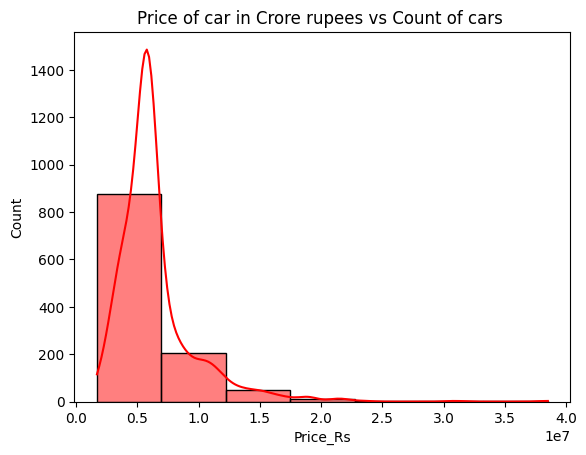

In [112]:
bins = np.linspace(1691711, 38514300.0, 8)
sb.histplot(data=df.Price_Rs,bins=bins,kde=True,color='red')
plt.title('Price of car in Crore rupees vs Count of cars ')
plt.show();

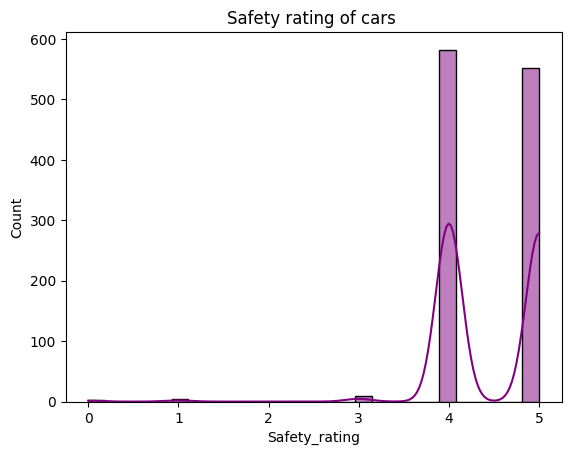

In [111]:

sb.histplot(data=df.Safety_rating,kde=True,color='purple')
plt.title('Safety rating of cars ')
plt.show();

<Axes: xlabel='_1_Stop_Range_in_km'>

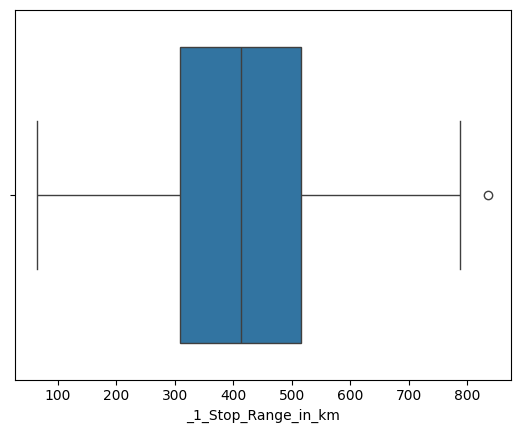

In [104]:
sb.boxplot(x=df._1_Stop_Range_in_km)

<Axes: xlabel='Towing_Capacity_in_KG'>

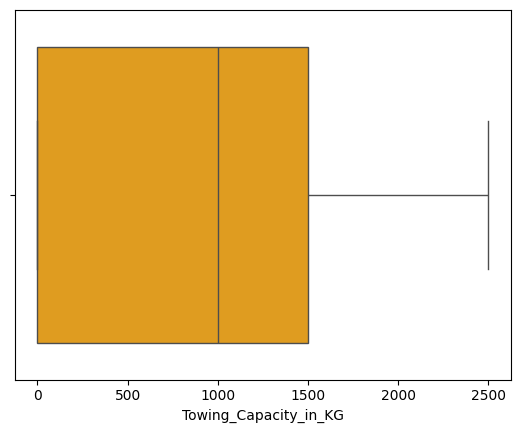

In [113]:
sb.boxplot(x=df.Towing_Capacity_in_KG,color='orange')

#### Categorical columns

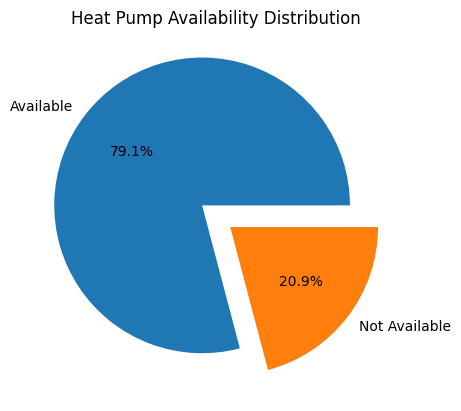

In [135]:


counts = df['Heat_pump_availavility'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%',explode=[0.12,0.12])
plt.title("Heat Pump Availability Distribution")
plt.show();

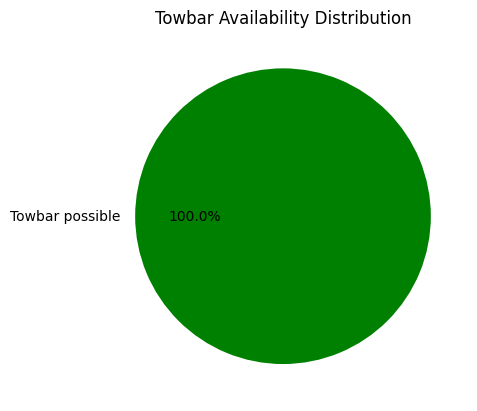

In [127]:
counts = df['Towbar_availability'].value_counts()
plt.pie(counts, labels=counts.index,colors='grey', autopct='%1.1f%%')
plt.title("Towbar Availability Distribution")
plt.show();

##  2- Bi-variate Analysis  

### Numerical Vs Numerical 

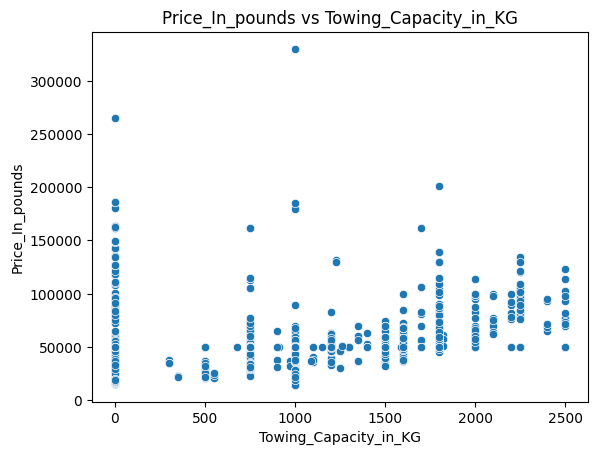

In [138]:
# scatterplot
plt.title("Price_In_pounds vs Towing_Capacity_in_KG")
sb.scatterplot(data=df,x=df.Towing_Capacity_in_KG,y=df.Price_In_pounds);

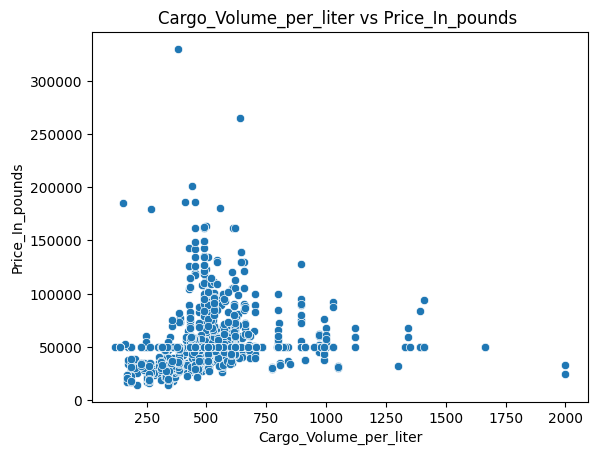

In [151]:
plt.title("Cargo_Volume_per_liter vs Price_In_pounds ")
sb.scatterplot(data=df,x=df.Cargo_Volume_per_liter,y=df.Price_In_pounds);



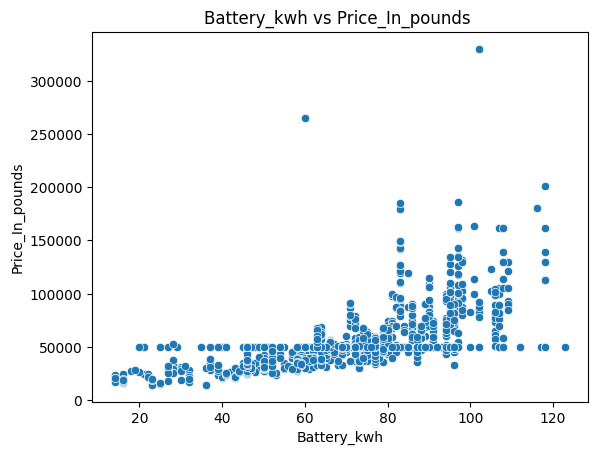

In [152]:
plt.title("Battery_kwh vs Price_In_pounds ")
sb.scatterplot(data=df,x=df.Battery_kwh,y=df.Price_In_pounds);



### catogorical Vs Numerical 

<Axes: xlabel='Avalability_Status', ylabel='Price_In_pounds'>

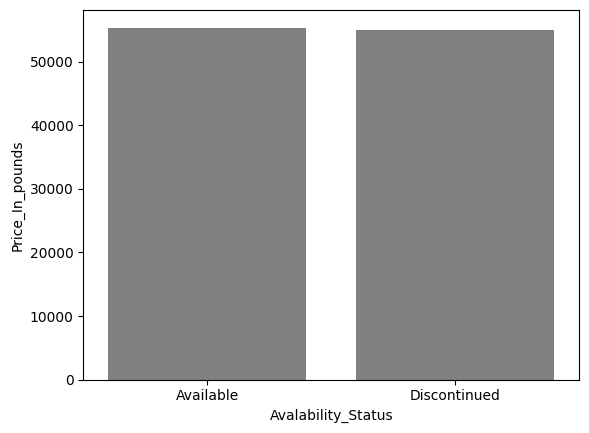

In [161]:
sb.barplot(x=df.Avalability_Status,y=df.Price_In_pounds,ci=False,color='Grey')

<Axes: xlabel='Towbar_availability', ylabel='Price_In_pounds'>

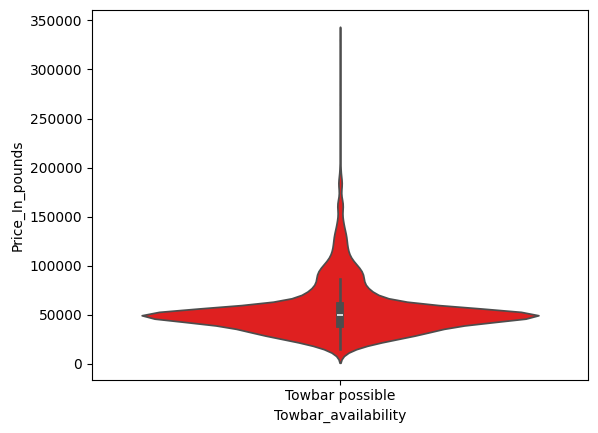

In [166]:
sb.violinplot(x=df.Towbar_availability,y=df.Price_In_pounds,color='red')

<Axes: xlabel='Heat_pump_availavility', ylabel='Price_In_pounds'>

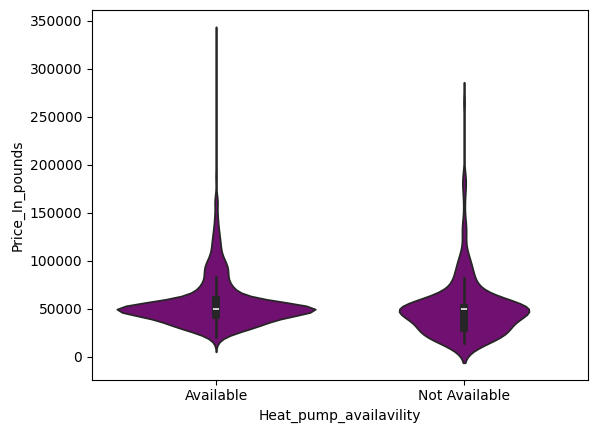

In [167]:
sb.violinplot(x=df.Heat_pump_availavility,y=df.Price_In_pounds,color='purple')

### categorical Vs categorical 

In [182]:
tab1=pd.crosstab(
    index=df["Model"],
    columns=df["Heat_pump_availavility"],
)

<Axes: xlabel='Heat_pump_availavility', ylabel='Model'>

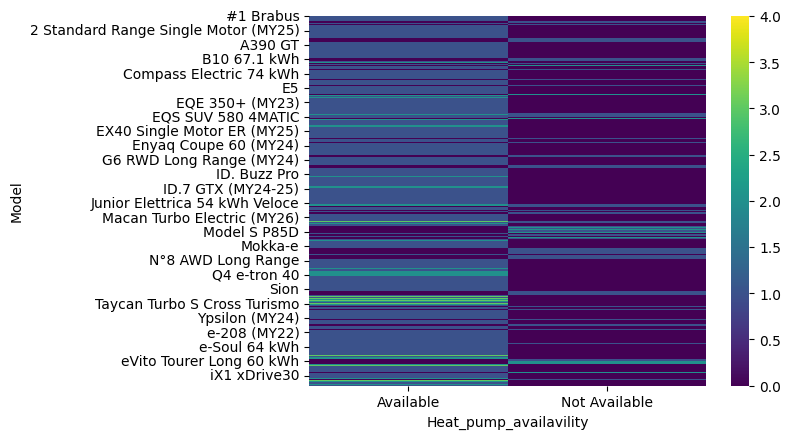

In [185]:
sb.heatmap(tab1,cmap=sb.color_palette("viridis", as_cmap=True))

# Multi - Variate Analysis 

### Heat map  2 -categorical ,1- Numerical

In [175]:
tab=pd.crosstab(
    index=df["Model"],
    columns=df["Towbar_availability"],
    values=df["Price_In_pounds"],
    aggfunc='mean'
)
tab

Towbar_availability,Towbar possible
Model,
#1 Brabus,44960.0
#1 Premium,39660.0
#1 Pro,32960.0
#1 Pro+,36960.0
#1 Pulse,49595.0
...,...
ë-SpaceTourer M 50 kWh,36840.0
ë-SpaceTourer M 75 kWh,45815.0
ë-SpaceTourer XL 50 kWh,37710.0


<Axes: xlabel='Towbar_availability', ylabel='Model'>

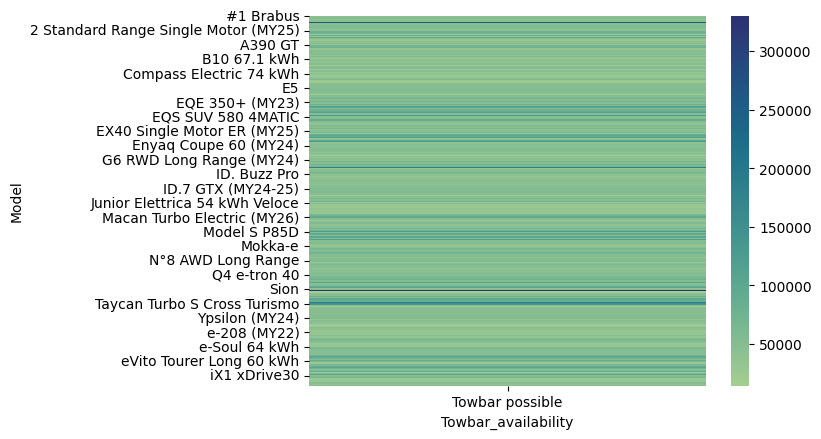

In [180]:
sb.heatmap(tab,cmap=sb.color_palette("crest", as_cmap=True))

### Heat map  1 -categorical ,2- Numerical

In [190]:
df["Price_bin"] = pd.cut(df["Price_In_pounds"], bins=5)
df["Battery_bin"] = pd.cut(df["Battery_kwh"], bins=5)

tab3 = pd.crosstab(
    index=df["Price_bin"],
    columns=df["Battery_bin"],
    values=df["Model"],
    aggfunc="count"
)
tab3


Battery_bin,"(13.891, 35.8]","(35.8, 57.6]","(57.6, 79.4]","(79.4, 101.2]","(101.2, 123.0]"
Price_bin,,,,,
"(14179.495, 77596.0]",66,228,439,226,33
"(77596.0, 140697.0]",0,0,6,101,29
"(140697.0, 203798.0]",0,0,0,14,5
"(203798.0, 266899.0]",0,0,1,0,0
"(266899.0, 330000.0]",0,0,0,0,1


<Axes: xlabel='Battery_bin', ylabel='Price_bin'>

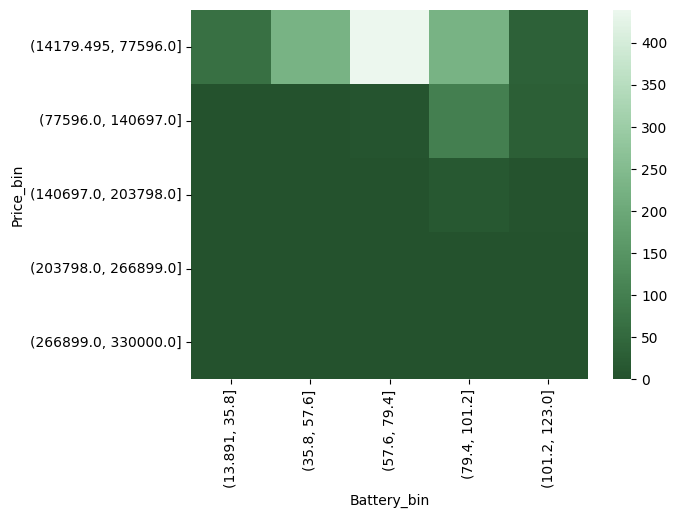

In [201]:
sb.heatmap(tab3,cmap=sb.cubehelix_palette(start=2, rot=0, dark=0.25, light=.95, reverse=True, as_cmap=True)
          )

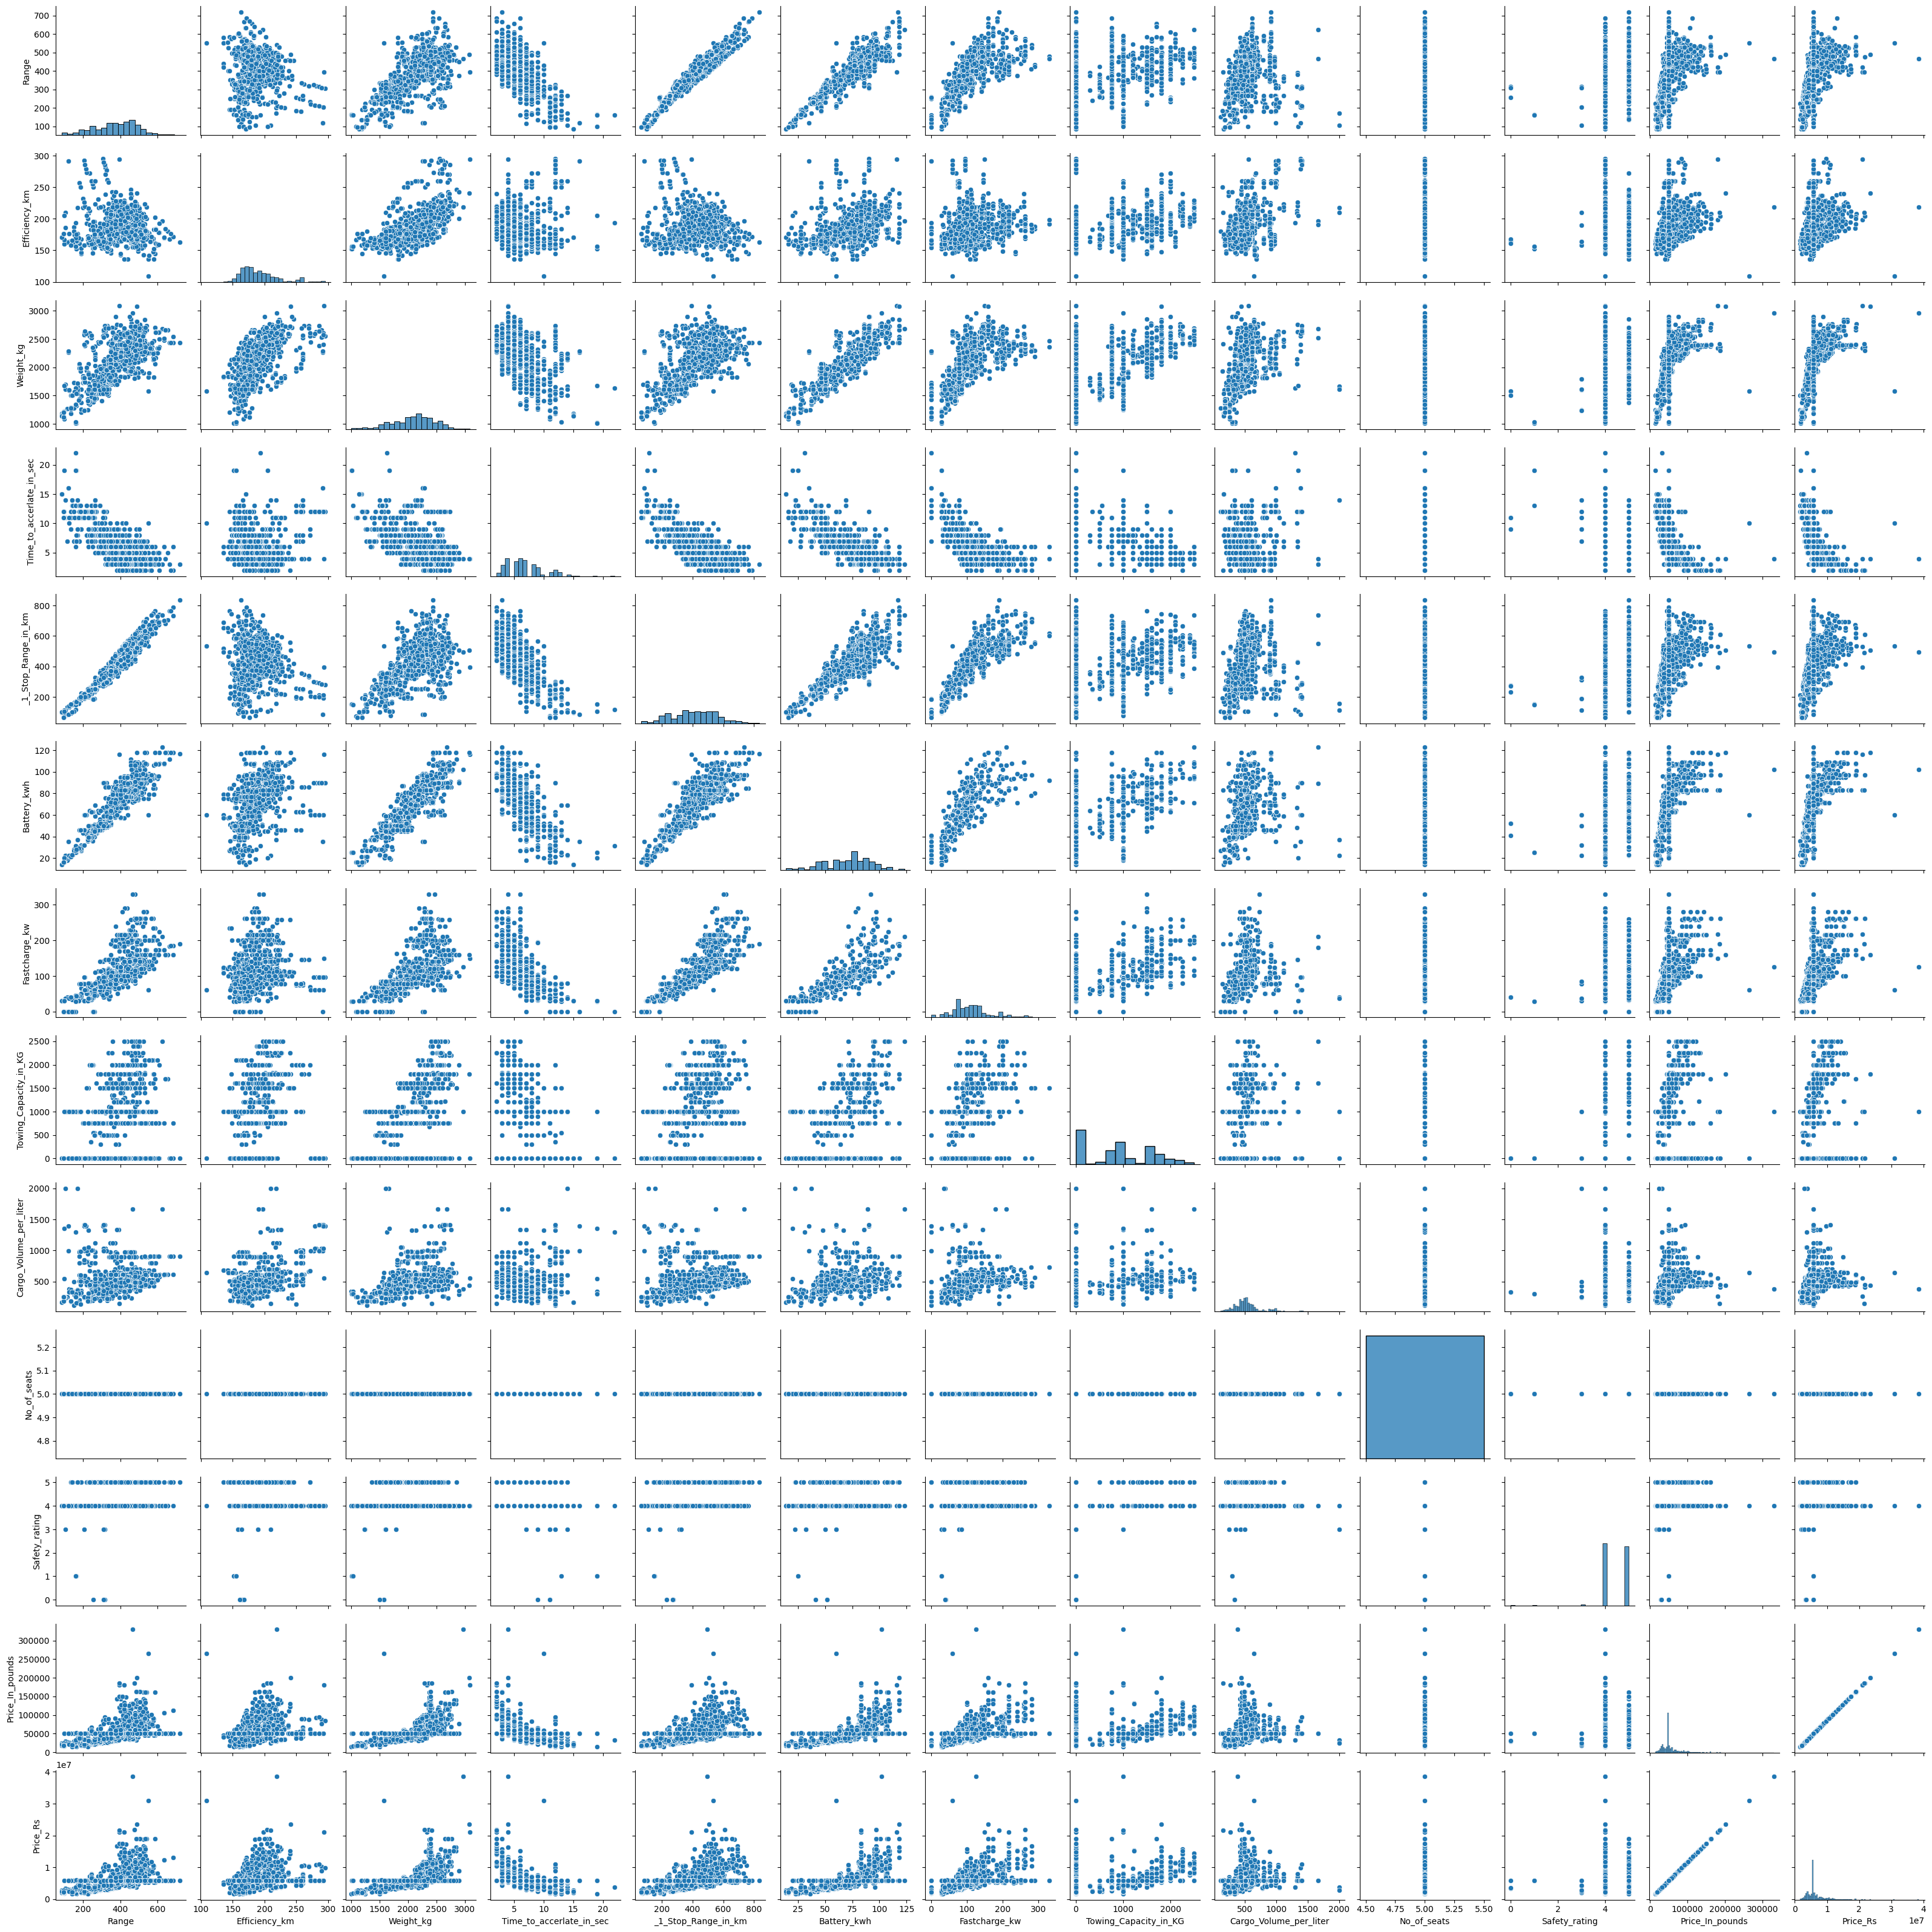

In [202]:
sb.pairplot(df)